<a href="https://colab.research.google.com/github/Kelvin364/ALU_MACHINE-LEARNING/blob/main/PCA_Formative_1%5BPeer_Pair_Number%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Formative Assignment: Advanced Linear Algebra (PCA)
This notebook will guide you through the implementation of Principal Component Analysis (PCA). Fill in the missing code and provide the required answers in the appropriate sections. You will work with a dataset that is Africanized .

Make sure to display outputs for each code cell when submitting.

### Step 1: Load and Standardize the Data
Before applying PCA, we must standardize the dataset. Standardization ensures that all features have a mean of 0 and a standard deviation of 1, which is essential for PCA.
Fill in the code to standardize the dataset.

STRICTLY - Write code that implements standardization based on the image below

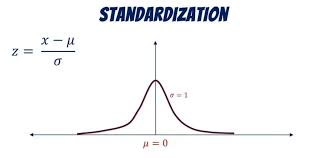


In [34]:
#Uploading the Malaria in Africa datasets
import kagglehub
import pandas as pd
import os

path = kagglehub.dataset_download("lydia70/malaria-in-africa")
files = os.listdir(path)
file_path = os.path.join(path, files[0])
data = pd.read_csv(file_path)
data

,Country Name,Year,Country Code,"Incidence of malaria (per 1,000 population at risk)",Malaria cases reported,Use of insecticide-treated bed nets (% of under-5 population),Children with fever receiving antimalarial drugs (% of children under age 5 with fever),Intermittent preventive treatment (IPT) of malaria in pregnancy (% of pregnant women),People using safely managed drinking water services (% of population),"People using safely managed drinking water services, rural (% of rural population)",...,Urban population growth (annual %),People using at least basic drinking water services (% of population),"People using at least basic drinking water services, rural (% of rural population)","People using at least basic drinking water services, urban (% of urban population)",People using at least basic sanitation services (% of population),"People using at least basic sanitation services, rural (% of rural population)","People using at least basic sanitation services, urban (% of urban population)",latitude,longitude,geometry
0,Algeria,2007,DZA,0.01,26.0,NaN,NaN,NaN,NaN,NaN,...,2.71,91.68,85.83,94.78,85.85,76.94,90.57,28.033886,1.659626,POINT (28.033886 1.659626)
1,Angola,2007,AGO,286.72,1533485.0,18.0,29.8,1.5,NaN,NaN,...,5.01,47.96,23.77,65.83,37.26,14.00,54.44,-11.202692,17.873887,POINT (-11.202692 17.873887)
2,Benin,2007,BEN,480.24,0.0,NaN,NaN,NaN,NaN,NaN,...,4.09,63.78,54.92,76.24,11.80,4.29,22.36,9.307690,2.315834,POINT (9.307689999999999 2.315834)
3,Botswana,2007,BWA,1.03,390.0,NaN,NaN,NaN,NaN,NaN,...,4.80,78.89,57.60,94.35,61.60,39.99,77.30,-22.328474,24.684866,POINT (-22.328474 24.684866)
4,Burkina Faso,2007,BFA,503.80,44246.0,NaN,NaN,NaN,NaN,NaN,...,5.91,52.27,45.13,76.15,15.60,6.38,46.49,12.238333,-1.561593,POINT (12.238333 -1.561593)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
589,Togo,2017,TGO,278.20,1755577.0,69.7,31.1,41.7,NaN,NaN,...,3.79,65.13,48.39,89.06,16.13,7.40,28.61,8.619543,0.824782,POINT (8.619543 0.824782)
590,Tunisia,2017,TUN,NaN,NaN,NaN,NaN,NaN,92.66,NaN,...,1.57,96.25,88.71,99.70,90.92,81.35,95.29,33.886917,9.537499,POINT (33.886917 9.537499)
591,Uganda,2017,UGA,336.76,11667831.0,NaN,NaN,NaN,7.07,4.46,...,6.25,49.10,41.25,75.11,18.47,16.17,26.11,1.373333,32.290275,POINT (1.373333 32.290275)
592,Zambia,2017,ZMB,160.05,5505639.0,NaN,NaN,NaN,NaN,NaN,...,4.21,59.96,41.95,83.86,26.37,18.93,36.24,-13.133897,27.849332,POINT (-13.133897 27.849332)


In [35]:
# Step 1: Load and Standardize the data (use of numpy only allowed)
import numpy as np

numeric_data = data.select_dtypes(include=[np.number])

# Remove columns with all NaN values (if any)
numeric_data = numeric_data.dropna(axis=1, how='all')

# Fill remaining NaN values with column mean
numeric_data = numeric_data.fillna(numeric_data.mean())
mean = np.mean(numeric_data.values, axis=0)  # Mean of each column
std = np.std(numeric_data.values, axis=0)     # Std of each column

# Avoid division by zero
std[std == 0] = 1

standardized_data = (numeric_data.values - mean) / std

# Display the first 5 rows
standardized_data[:5]


array([[-1.58113883e+00, -1.21256459e+00, -5.06760222e-01,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        -6.55710122e-16,  0.00000000e+00,  5.41893472e-16,
        -1.20335604e+00,  1.84377536e+00, -1.45712868e+00,
        -1.23400095e+00, -1.66809102e+00,  1.23397271e+00,
        -5.61646882e-01,  1.49495110e+00,  1.86242385e+00,
         1.15800583e+00,  1.77365688e+00,  2.08348956e+00,
         1.99788845e+00,  1.60900436e+00, -7.83191277e-01],
       [-1.58113883e+00,  6.16449417e-01,  2.20650663e-01,
        -2.59139328e+00, -4.70762105e-02, -2.59441287e+00,
        -6.55710122e-16,  0.00000000e+00,  5.41893472e-16,
         0.00000000e+00, -1.17007624e-15,  0.00000000e+00,
        -7.98503589e-01,  4.36548583e-01,  7.98470288e-01,
         1.02714839e+00, -1.04968763e+00, -1.49943184e+00,
        -2.03128810e+00, -8.45063064e-02, -6.00246444e-01,
         2.98713596e-01, -8.95720879e-01,  2.65347191e-02],
       [-1.58113883e+00,  1.85097486e+00, -5.06772555e

removing the Nan values as PCA does not work with Nan values

### Step 3: Calculate the Covariance Matrix
The covariance matrix helps us understand how the features are related to each other. It is a key component in PCA.

In [36]:
# Step 3: Calculate the Covariance Matrix
cov_matrix = np.cov(standardized_data, rowvar=False)

# Display the covariance matrix
cov_matrix

array([[ 1.00168634e+00, -6.80542806e-02,  3.57947203e-01,
         2.33223297e-01, -1.83047706e-02,  1.75372178e-01,
         3.65843539e-02,  6.59681612e-02,  2.73071409e-02,
         3.84413217e-02,  9.46769860e-02,  2.67796335e-02,
        -8.40379544e-02, -4.97357957e-02,  8.40398632e-02,
        -5.65317141e-02,  1.18565745e-01,  1.10879038e-01,
         1.00777429e-01,  6.83801684e-02,  6.84030302e-02,
         5.87010243e-02, -9.12704426e-19,  5.24219978e-18],
       [-6.80542806e-02,  1.00168634e+00,  2.88995393e-01,
         4.30348950e-03,  2.29939995e-01,  6.06777508e-02,
        -1.75492561e-01, -1.69633937e-01, -3.72772114e-01,
        -2.07579206e-01, -9.71252108e-02, -1.62720237e-01,
         2.45446793e-01,  3.87139217e-01, -2.45450290e-01,
         3.09619690e-01, -3.68912526e-01, -3.13484257e-01,
        -3.99015433e-01, -4.40983873e-01, -3.75800980e-01,
        -4.25948448e-01,  5.88013289e-02, -2.64875225e-01],
       [ 3.57947203e-01,  2.88995393e-01,  1.00168634e

### Step 4: Perform Eigendecomposition
Eigendecomposition of the covariance matrix will give us the eigenvalues and eigenvectors, which are essential for PCA.
Fill in the code to compute the eigenvalues and eigenvectors of the covariance matrix.

In [37]:
# Step 4: Perform Eigendecomposition
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# Sort eigenvalues and eigenvectors in descending order
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]

# Display the eigenvalues
eigenvalues

array([7.47866447e+00, 2.23494453e+00, 2.04877421e+00, 1.77596923e+00,
       1.46507889e+00, 1.28042481e+00, 1.17147431e+00, 1.01911332e+00,
       8.90113383e-01, 7.57789569e-01, 6.66562869e-01, 6.49614679e-01,
       6.01745519e-01, 4.36829542e-01, 3.78377003e-01, 3.19286817e-01,
       2.20070925e-01, 2.12741241e-01, 1.72714643e-01, 1.26540049e-01,
       9.60916442e-02, 3.12818609e-02, 6.26864578e-03, 1.05297883e-08])

### Step 5: Sort Principal Components
Sort the eigenvectors based on their corresponding eigenvalues in descending order. The higher the eigenvalue, the more important the eigenvector.
Complete the code to sort the eigenvectors and print the sorted components.

<a url ='https://www.youtube.com/watch?v=vaF-1xUEXsA&t=17s'>How Is Explained Variance Used In PCA?'<a/>

In [38]:
# Step 5: Sort Principal Components
explained_variance_ratio = eigenvalues / np.sum(eigenvalues)

# Compute cumulative explained variance
cumulative_variance = np.cumsum(explained_variance_ratio)

# Display explained variance ratios and cumulative variance
for i, (evr, cum) in enumerate(zip(explained_variance_ratio, cumulative_variance), start=1):
    print(f"PC{i}: {evr:.4f}  Cumulative: {cum:.4f}")

PC1: 0.3111  Cumulative: 0.3111
PC2: 0.0930  Cumulative: 0.4041
PC3: 0.0852  Cumulative: 0.4893
PC4: 0.0739  Cumulative: 0.5631
PC5: 0.0609  Cumulative: 0.6241
PC6: 0.0533  Cumulative: 0.6774
PC7: 0.0487  Cumulative: 0.7261
PC8: 0.0424  Cumulative: 0.7685
PC9: 0.0370  Cumulative: 0.8055
PC10: 0.0315  Cumulative: 0.8370
PC11: 0.0277  Cumulative: 0.8647
PC12: 0.0270  Cumulative: 0.8918
PC13: 0.0250  Cumulative: 0.9168
PC14: 0.0182  Cumulative: 0.9350
PC15: 0.0157  Cumulative: 0.9507
PC16: 0.0133  Cumulative: 0.9640
PC17: 0.0092  Cumulative: 0.9731
PC18: 0.0088  Cumulative: 0.9820
PC19: 0.0072  Cumulative: 0.9892
PC20: 0.0053  Cumulative: 0.9944
PC21: 0.0040  Cumulative: 0.9984
PC22: 0.0013  Cumulative: 0.9997
PC23: 0.0003  Cumulative: 1.0000
PC24: 0.0000  Cumulative: 1.0000


In [39]:
# Calculate explained variance ratio
total_variance = np.sum(sorted_eigenvalues)
explained_variance_ratio = sorted_eigenvalues / total_variance
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)
cumulative_variance_ratio

array([0.35423108, 0.4507092 , 0.53039035, 0.60735246, 0.67242334,
       0.72850574, 0.77253039, 0.80844272, 0.84287644, 0.87625935,
       0.9052265 , 0.93238888, 0.95109502, 0.96680906, 0.97707783,
       0.98581174, 0.99309315, 0.99816123, 0.99965623, 1.        ,
       1.        ])

### Step 6: Project Data onto Principal Components
Now that we’ve selected the number of components, we will project the original data onto the chosen principal components.
Fill in the code to perform the projection.

In [40]:
# Step 6: Project Data onto Principal Components
num_components = 8
selected_vectors = eigenvectors[:, :num_components]

# Project standardized data onto the principal components
pca_data = standardized_data.dot(selected_vectors)

# Display the first 5 rows of projected data
pca_data[:5]

array([[ 4.22525811, -1.9622283 ,  2.24984972, -0.38749381,  0.43053691,
         2.38324007,  0.39397177, -0.16940471],
       [-1.54423135, -0.47672866,  0.32876327,  3.46372508,  0.72387603,
        -0.44455782,  2.69229049, -1.32807757],
       [-1.78083426, -1.08796635, -0.7715882 ,  1.19742021,  0.2377475 ,
         0.88271836, -0.77992688, -0.68517593],
       [ 2.86128444,  0.17608171,  2.14168675,  0.82906946, -0.04660428,
        -1.37053427, -0.59448648, -1.39348563],
       [-2.52840042, -0.48298968, -1.22026901,  1.29716707, -0.38609518,
         1.56553552, -0.51839394, -0.68485408]])

### Step 7: Output the Reduced Data
Finally, display the reduced data obtained by projecting the original dataset onto the selected principal components.

In [41]:
# Step 7: Output the Reduced Data
import pandas as pd

# Create a DataFrame for the reduced data
pca_columns = [f'PC{i+1}' for i in range(pca_data.shape[1])]
reduced_df = pd.DataFrame(pca_data, columns=pca_columns)

# Display the first 5 rows of the reduced data
reduced_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
0,4.225258,-1.962228,2.249850,-0.387494,0.430537,2.383240,0.393972,-0.169405
1,-1.544231,-0.476729,0.328763,3.463725,0.723876,-0.444558,2.692290,-1.328078
2,-1.780834,-1.087966,-0.771588,1.197420,0.237747,0.882718,-0.779927,-0.685176
3,2.861284,0.176082,2.141687,0.829069,-0.046604,-1.370534,-0.594486,-1.393486
4,-2.528400,-0.482990,-1.220269,1.297167,-0.386095,1.565536,-0.518394,-0.684854


### Step 8: Visualize Before and After PCA
Now, let's plot the original data and the data after PCA to compare the reduction in dimensions visually.

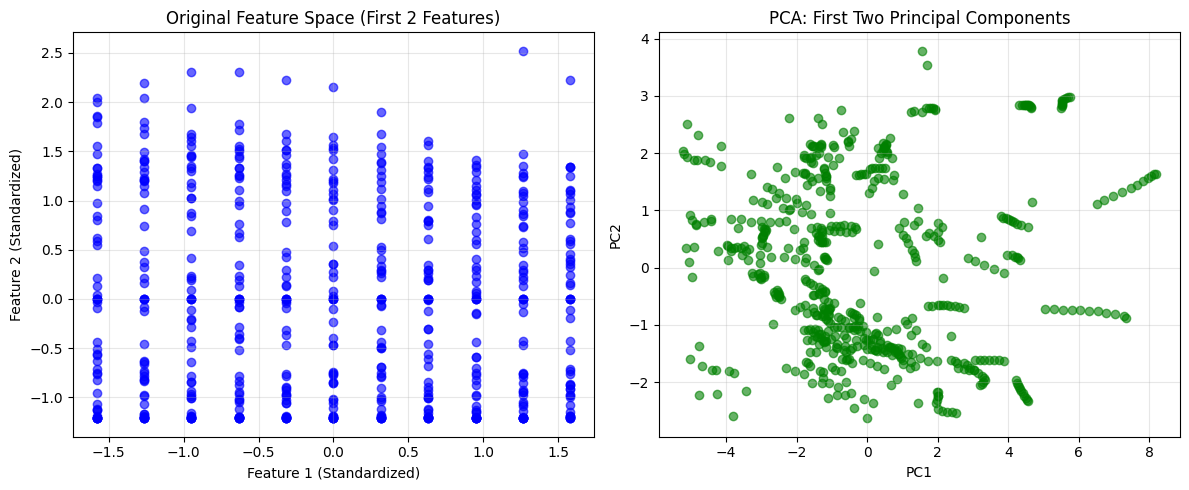

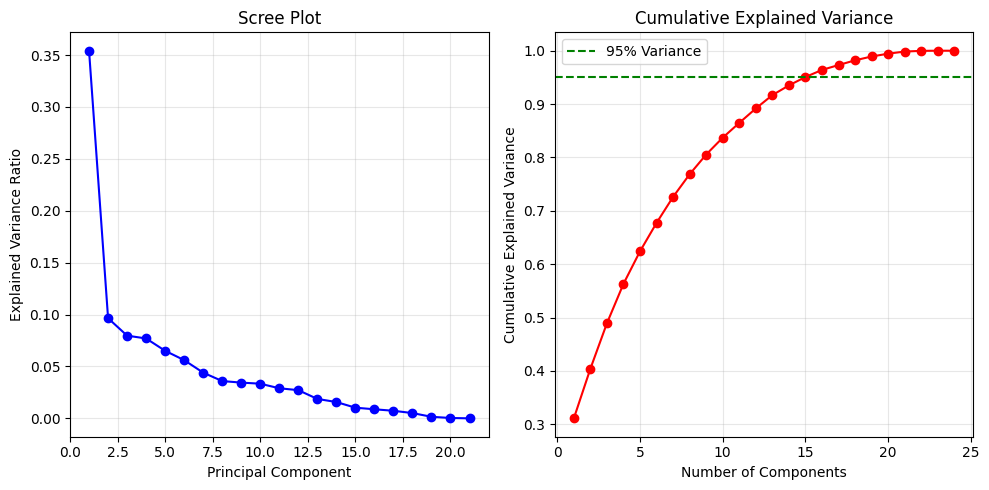

In [44]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

# Plot original data (first two features)
plt.subplot(1, 2, 1)
plt.scatter(standardized_data[:, 0], standardized_data[:, 1], c='blue', alpha=0.6)
plt.xlabel('Feature 1 (Standardized)')
plt.ylabel('Feature 2 (Standardized)')
plt.title('Original Feature Space (First 2 Features)')
plt.grid(True, alpha=0.3)

# Plot reduced data after PCA
plt.subplot(1, 2, 2)
plt.scatter(pca_data[:, 0], pca_data[:, 1], c='green', alpha=0.6)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA: First Two Principal Components')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, 'bo-')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot')
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, 'ro-')
plt.axhline(y=0.95, color='g', linestyle='--', label='95% Variance')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()